In [3]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT = Path().resolve().parents[0]
CSV_FILE = PROJECT_ROOT / "data" / "final" / "deck_dataset.csv"

In [5]:
decks = pd.read_csv(CSV_FILE, index_col=0)  # deck_id est l'index
decks.head()

,deck_id,cards,vector_0,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,...,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,faction,cluster
0,0,"['ALT_CORE_B_OR_02_C', 'ALT_CORE_B_OR_09_R1', ...",0.094404,0.114494,-0.376248,0.457467,-0.021191,0.321287,0.654528,-0.489696,...,-0.396672,0.011763,0.434032,0.469853,0.165829,-0.190606,-0.119669,-0.620482,1,2.0
1,1,"['ALT_CORE_B_OR_02_C', 'ALT_CORE_B_OR_21_R1', ...",0.127600,0.106383,-0.366894,0.469701,-0.063110,0.315607,0.652482,-0.469424,...,-0.370065,0.009062,0.451206,0.465901,0.159026,-0.196788,-0.101469,-0.603515,1,2.0
2,2,"['ALT_CORE_B_LY_03_C', 'ALT_CORE_B_MU_16_R2', ...",-0.039143,-0.157406,-0.033830,0.059670,0.237632,0.287525,0.196209,0.377128,...,0.780496,-0.067199,0.756291,0.395447,0.462590,-0.026603,-0.042603,-0.428428,0,0.0
3,3,"['ALT_CORE_B_OR_02_C', 'ALT_CORE_B_OR_16_R1', ...",0.118183,0.100143,-0.383390,0.497211,-0.062463,0.296121,0.680080,-0.498610,...,-0.378312,0.050005,0.431315,0.480949,0.135815,-0.182889,-0.114152,-0.621144,1,2.0
4,4,"['ALT_CORE_B_OR_02_C', 'ALT_CORE_B_OR_09_R1', ...",0.107765,0.121085,-0.414760,0.504940,-0.057522,0.336122,0.710148,-0.505832,...,-0.387039,0.050690,0.449223,0.523810,0.163446,-0.213138,-0.134894,-0.669501,1,2.0


In [6]:
import numpy as np

vector_cols = [c for c in decks.columns if c.startswith("vector_")]
embeddings = decks[vector_cols].to_numpy()

In [8]:
from sklearn.manifold import TSNE
import umap

# TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
emb_2d = tsne.fit_transform(embeddings)

# ou UMAP
# reducer = umap.UMAP(n_components=2, random_state=42)
# emb_2d = reducer.fit_transform(embeddings)

decks["x"] = emb_2d[:, 0]
decks["y"] = emb_2d[:, 1]

c:\Users\trist\AppData\Local\pypoetry\Cache\virtualenvs\empyree-dIymDXH_-py3.13\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


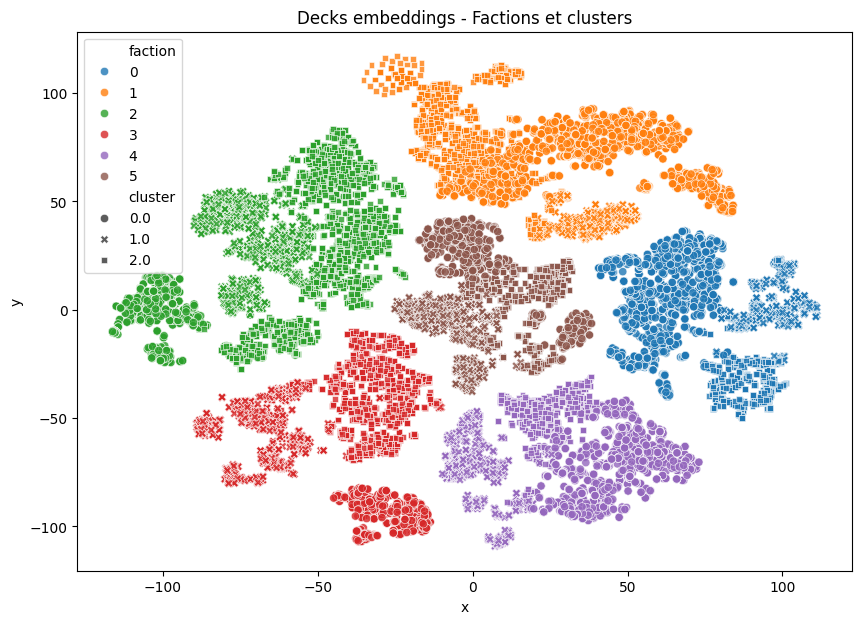

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=decks,
    x="x", y="y",
    hue="faction",           # couleur par faction
    style="cluster",         # forme par sous-cluster
    palette="tab10",
    alpha=0.8
)
plt.title("Decks embeddings - Factions et clusters")
plt.show()

In [9]:
from collections import Counter

# Exemple : cluster 0
cluster0 = decks[decks["cluster"] == 0]

# Comptage des cartes dans ce cluster
all_cards = [card for deck in cluster0["cards"] for card in eval(deck)]  # deck est une string de liste
counter = Counter(all_cards)
print(counter.most_common(10))  # Top 10 cartes les plus fréquentes

[('ALT_CORE_B_OR_24_C', 5350), ('ALT_CORE_B_OR_05_R1', 5080), ('ALT_CORE_B_OR_16_R1', 4991), ('ALT_CORE_B_LY_13_C', 4799), ('ALT_CORE_B_OR_08_C', 4557), ('ALT_CORE_B_LY_07_C', 4514), ('ALT_CORE_B_LY_04_C', 4496), ('ALT_CORE_B_LY_10_R1', 4413), ('ALT_CORE_B_LY_23_C', 4341), ('ALT_CORE_B_OR_14_C', 4289)]
